<a href="https://colab.research.google.com/github/musab-hack/Java-Projects-/blob/master/MNIST_Datasets_python_code_with_full_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with MNIST datasets, Complete Tutorial with Explanation



## Some Important Points to Note down!!!!


**1)** You can either define a utility function (or fitness function) that measures how good your model is, or you can define a **cost function** that measures how bad it is.

**2)** For **linear regression problems**, people
typically use a cost function that measures the distance between the linear model’s predictions and the training examples; the objective is to minimize this distance.

URL : https://ibb.co/qrC71qK     (Image)

**3)** During Clearning of data some instances are clearly outliers, it may help to simply discard them

**4)** ***Overfitting the Training Data***: In Machine Learning this is called overfitting: it means that the model performs well on the training data, but it does not generalize well.

**5)** Regularization reduces the risk of overfitting of datasets and it can be controlled by the hyperparameter

**6)** Important concept about **Non-Linear Regression** and **Linear Regression**
https://www.javatpoint.com/machine-learning-polynomial-regression#:~:text=ML%20Polynomial%20Regression&text=It%20is%20also%20called%20the,order%20to%20increase%20the%20accuracy.

**7)** Be aware about the Nonlinear Datasets and Linear Datasets

**8)** For the best choice of the model you can use the Cross Validation 

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784' , version=1)

In [4]:
data , target = mnist["data"] , mnist["target"]
data[1] # Single Pixel

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [5]:
data.shape # Print the rows and columns of the data

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

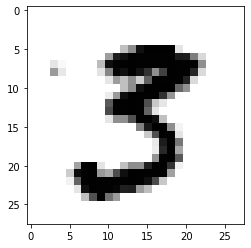

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = data[49]
digit = digit.reshape(28 , 28)

plt.imshow(digit , cmap = mpl.cm.binary , interpolation="nearest")
plt.show()

Note that the label is a string, we need to convert into int 


In [7]:
target = target.astype(np.uint8)
target[12]

3

You should always create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):


# **Training The Binary Classifier**

We are here using the Stohastic Gradient Decent (SGD). This classifier
has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning).

In [8]:
from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = data[:60000], data[60000:], target[:60000], target[60000:]
y_train_3 = (y_train == 3) # True for all 5s, False for all other digits.
y_test_3 = (y_test == 3)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)
digit = digit.reshape(1, 784)
sgd_clf.predict(digit)

array([ True])

# **Perfomance Measure**
Let’s use the cross_val_score() function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds.

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train ,y_train_3, cv=3,scoring="accuracy" )

array([0.9496 , 0.9624 , 0.96275])

let’s look at a very
dumb classifier that just classifies every single image in the “not-5”.
When we calculate for the NOT 3, it gives me 90% accuracy, it means that data is skewed.
**When you have skewed Datasets Accuracy will not give best performance Measure**

# **WHAT DO WE DO NOW????????**
## here Come Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confusion
matrix. The general idea is to count the number of times instances of class A are
classified as class B.


In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , X_train ,y_train_3, cv=3)


In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_3 , y_train_pred)

array([[53477,   392],
       [ 2113,  4018]])

Each row in a confusion matrix represents an actual class, while each column represents
a predicted class. The first row of this matrix considers non-3 images (the negative.

**53477 of them were correctly classified as non-3s.**

**392 were wrongly classified as 3s (false positives).**

**2113 were wrongly classified as non-3s (false negatives).**

**4,096 were correctly classified
as 3s (true positives).** 

precision = TP/
(TP + FP)
TP = True Positive vise versa

# Precision and Recall
## Recall = Out of all the possible positive labels, how many did the model correctly identify?
it is just like confusion matrix but it calculate the precision for you.....

https://www.photobox.co.uk/my/photo/full?photo_id=503218270406

In [26]:
from sklearn.metrics import precision_score, recall_score

# It Detect 3 && It is Correct
# TP / (TP + FP)
print("It Detect 3 && It is Correct" , precision_score(y_train_3 , y_train_pred))
# TP / (TP + FN)
# It Only Detects
print("It Only Detects" , recall_score(y_train_3 , y_train_pred))

It Detect 3 && It is Correct 0.9111111111111111
It Only Detects 0.655358016636764


## F1 Score is the combination of the Precision and Recall values.
Harmonic Mean of the precision and Recall value is F1 Score

Inceasing Precision and Decrease Recall is best for accurate result, **this is also called Recall Tradeoff or Precision**

In [18]:
from sklearn.metrics import f1_score
# Precison 

print("Precison is: ", f1_score(y_train_3 , y_train_pred))

Precison is:  0.7623565126648326


https://www.photobox.co.uk/my/photo/full?photo_id=503218269439

www.photobox.co.uk/my/photo/full?photo_id=503218270402

you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold

In [39]:
y_score = sgd_clf.decision_function([digit])
y_score 
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [43]:
y_score = sgd_clf.decision_function([digit])
y_score 
threshold = 5000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents
a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 5000.

**Now how do you decide which threshold to use**? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again,

In [44]:
y_score = cross_val_predict(sgd_clf , X_train , y_train_3 , cv=3,method="decision_function")
y_score
# you can compute precision and recall for all possible thresholds
# using the precision_recall_curve() function:

array([ -8938.67345168, -17073.83659907,  -2250.42625883, ...,
       -15330.33317379, -25099.35767753, -36457.78038114])

In [45]:
def plot_precision_graph(precisions,recall,threshold):
  plt.plot(threshold , precisions[:-1],"b--", label="Precision")
  plt.plot(threshold , recall[:-1] , "g-",label="Recall")
  

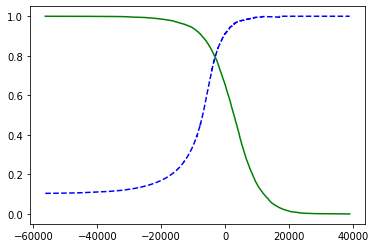

In [48]:
from sklearn.metrics import precision_recall_curve
precisions , recall , threshold = precision_recall_curve(y_train_3 , y_score)

plot_precision_graph(precisions , recall , threshold)
# Green is recall
# Blue is Precision


# **Selecting Good precision/recall tradeoff**
In this way we can graphically take neccessary updates if we want to change the precision of our project.

### Y_score an either be probability estimates of the positive class.

So let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 8,000. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first
True value):

In [55]:
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]
threshold_90_precision
y_train_pred_90 = (y_score >= threshold_90_precision)
y_score # of each instances

print(precision_score(y_train_3 , y_train_pred_90))
print(recall_score(y_train_3 , y_train_pred_90))

0.9000870700914236
0.6744413635622247


Great, you have a 90% precision classifier ! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold

# **Another Method - ROC CURVE**
